In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
data = pd.read_csv("smoking.csv")

In [4]:
data.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


# Sample characteristics

The sample resembles the UK adult population to some degree. There were slightly more females than males in the sample. The majority of the sample is married (48%) or single (25.3%). Participants had either no educational qualifications (35%), only GSCE/ 0 level education (18%) or higher study, e.g. degree, qualifications (15%). Almost all participants were of White ethnicity (92%), surpassing the 80% proportion of the 2021 Census. Three quarters of the sample did not engage in smoking behaviours, making the sample quite unbalanced in this way. The sample collected exhibits similarities to the UK adult population, providing valuable insights into the demographics. The gender distribution shows a slightly higher representation of females compared to males, indicating a modest gender imbalance. Regarding marital status, the majority of participants identified as married (48%), followed by those who reported being single (25.3%). In terms of educational qualifications, a notable portion of the sample (35%) had no formal qualifications, while 18% possessed GSCE/0 level education, and 15% had higher qualifications such as degrees. The ethnic composition of the sample was predominantly White (92%), surpassing the 80% reported in the 2021 Census. Notably, the smoking behavior distribution within the sample revealed a significant imbalance, with approximately three-quarters of participants reporting non-smoking habits. These insights highlight the importance of considering the sample's composition when interpreting findings related to smoking behaviors.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


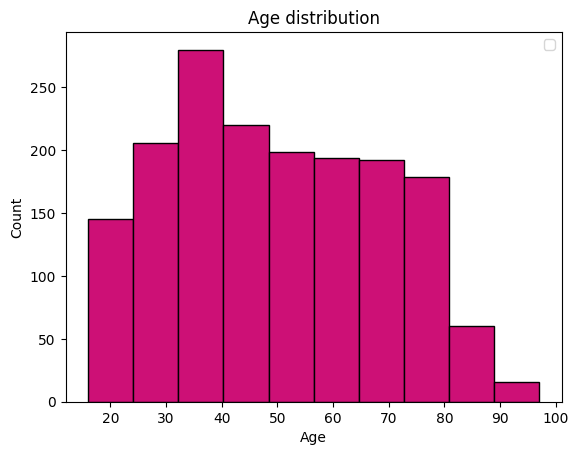

In [5]:
plt.hist(data['age'], edgecolor = 'black', color = '#CD1076')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age distribution")

plt.legend()
plt.show()

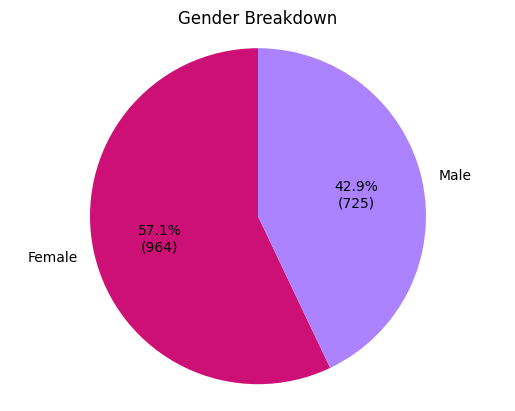

In [6]:
plt.clf()

gender_palette = {'Female': '#CD1076', 'Male': '#AB82FF'}
plt.pie(data['gender'].value_counts(), labels = data['gender'].value_counts().index, autopct= lambda pct: f'{pct:.1f}%\n({int(pct/100*len(data))})', shadow=False, startangle=90, colors = [gender_palette[label] for label in data['gender'].value_counts().index])

plt.axis('equal')
plt.title("Gender Breakdown")

plt.show()

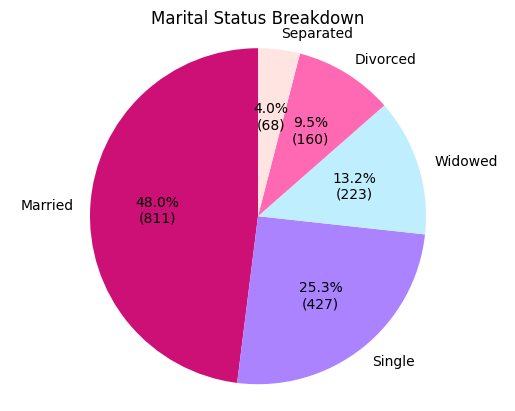

In [7]:
marital_palette = {'Married': '#CD1076', 'Single': '#AB82FF', 'Divorced' : '#FF69B4', 'Widowed' : '#BFEFFF', 'Separated' : '#FFE4E1'}
plt.pie(data['marital_status'].value_counts(), labels = data['marital_status'].value_counts().index, autopct= lambda pct: f'{pct:.1f}%\n({int(pct/100*len(data))})', shadow=False, startangle=90, colors = [marital_palette[label] for label in data['marital_status'].value_counts().index])

plt.axis('equal')
plt.title("Marital Status Breakdown")

plt.show()

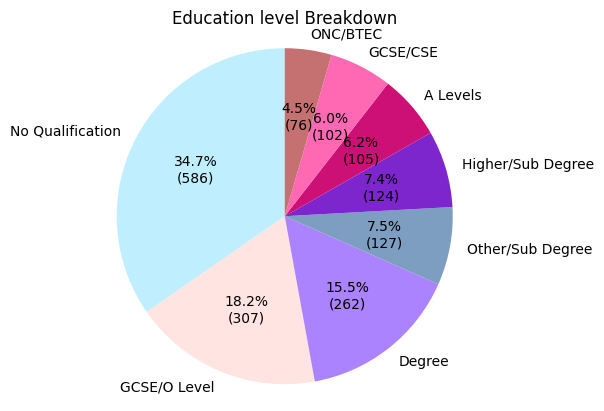

In [8]:
educ_palette = {'A Levels': '#CD1076', 'Degree': '#AB82FF', 'GCSE/CSE' : '#FF69B4', 'No Qualification' : '#BFEFFF', 'GCSE/O Level' : '#FFE4E1', 'Higher/Sub Degree' : '#7D26CD', 'ONC/BTEC' : '#C67171', 'Other/Sub Degree' : '#7D9EC0'}
plt.pie(data['highest_qualification'].value_counts(), labels = data['highest_qualification'].value_counts().index, autopct= lambda pct: f'{pct:.1f}%\n({int(pct/100*len(data))})', shadow=False, startangle=90, colors = [educ_palette[label] for label in data['highest_qualification'].value_counts().index])

plt.axis('equal')
plt.title("Education level Breakdown")

plt.show()

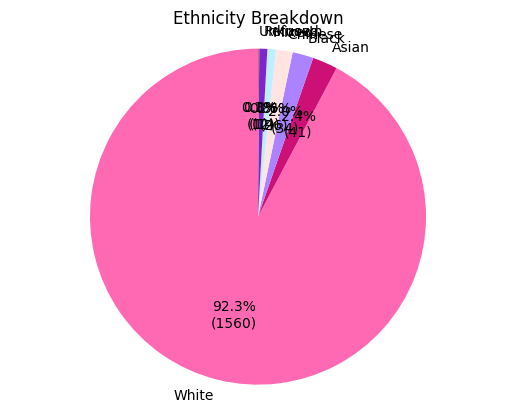

In [9]:
ethnicity_palette = {'Asian': '#CD1076', 'Black': '#AB82FF', 'White' : '#FF69B4', 'Mixed' : '#BFEFFF', 'Chinese' : '#FFE4E1', 'Refused' : '#7D26CD', 'Unknown' : '#C67171'}
plt.pie(data['ethnicity'].value_counts(), labels = data['ethnicity'].value_counts().index, autopct= lambda pct: f'{pct:.1f}%\n({int(pct/100*len(data))})', shadow=False, startangle=90, colors = [ethnicity_palette[label] for label in data['ethnicity'].value_counts().index])

plt.axis('equal')
plt.title("Ethnicity Breakdown")

plt.show()

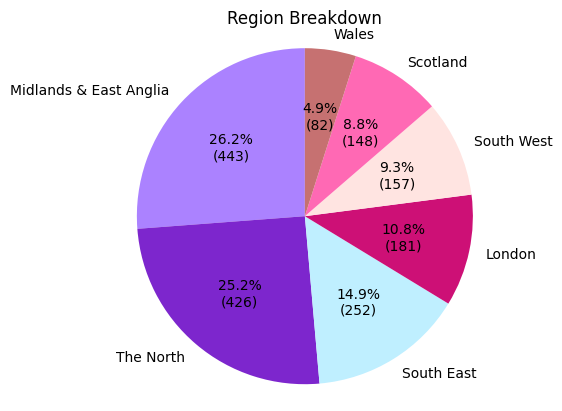

In [10]:
region_palette = {'London': '#CD1076', 'Midlands & East Anglia': '#AB82FF', 'Scotland' : '#FF69B4', 'South East' : '#BFEFFF', 'South West' : '#FFE4E1', 'The North' : '#7D26CD', 'Wales' : '#C67171'}
plt.pie(data['region'].value_counts(), labels = data['region'].value_counts().index, autopct= lambda pct: f'{pct:.1f}%\n({int(pct/100*len(data))})', shadow=False, startangle=90, colors = [region_palette[label] for label in data['region'].value_counts().index])

plt.axis('equal')
plt.title("Region Breakdown")

plt.show()

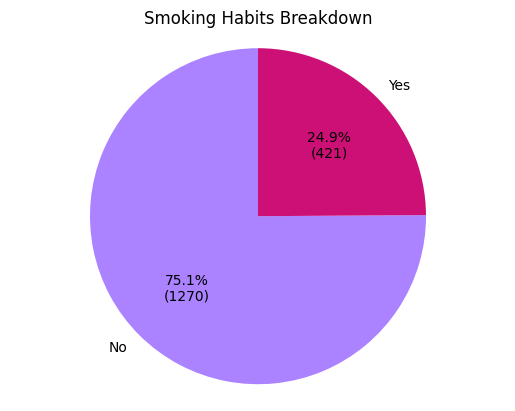

In [11]:
smoke_palette = {'Yes': '#CD1076', 'No': '#AB82FF'}

plt.pie(data['smoke'].value_counts(), labels = data['smoke'].value_counts().index, autopct= lambda pct: f'{pct:.1f}%\n({int(pct/100*len(data))})', shadow=False, startangle=90, colors = [smoke_palette[label] for label in data['smoke'].value_counts().index])

plt.axis('equal')
plt.title("Smoking Habits Breakdown")

plt.show()

# Exploratory Data Analysis
This section investigated smoking habits in different demographic groups, and aimed to identify specific populations that are more or less predisposed to smoke.

The distribution of smoking and non-smoking individuals in the population varies in terms of age. While the age distribution of the non-smoking population follows a normal distribution pattern, the age distribution of smokers deviates from normality. The plotted data reveals a negative relationship between age and smoking habits, indicating that as individuals age, their likelihood of smoking decreases. Notably, a peak in smoking prevalence occurs around the age of 30, with a gradual decline thereafter.

Analyzing smoking habits within gender groups, a similar trend is observed, closely resembling the overall sample pattern. Approximately a quarter of individuals in each gender group reported smoking habits. The pattern persists across different marital status categories as well.

However, when examining gender and marital status differences among smokers, noteworthy findings emerge. No significant gender disparities were observed between single and married smokers. However, among individuals who were divorced, separated, or widowed, the prevalence of female smokers was nearly double that of male smokers. This finding provides intriguing insights into potential gender-specific smoking predispositions following marriage separation, laying the groundwork for further investigations.

Regarding education levels, individuals with degree-level qualifications display a considerably lower proportion of smokers compared to those with other educational backgrounds. This suggests a potential association between higher educational attainment and reduced smoking prevalence.

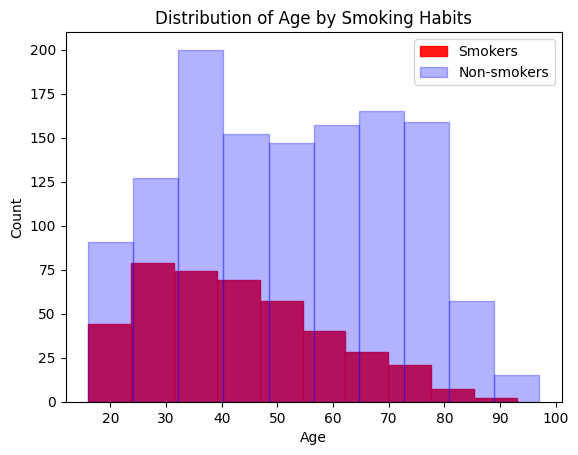

In [12]:
plt.clf()

plt.hist(data[data['smoke'] == 'Yes']['age'], label='Smokers', alpha=.9, edgecolor='red', color = 'red')
plt.hist(data[data['smoke'] == 'No']['age'], label='Non-smokers', alpha=.3, edgecolor='blue', color = 'blue')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Smoking Habits')

plt.legend()
plt.show()


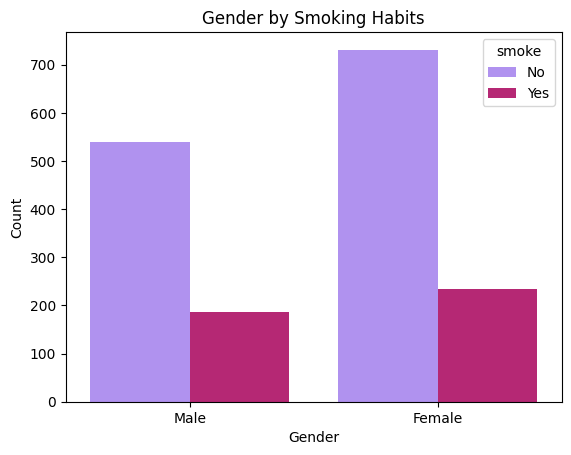

In [13]:
plt.clf()

custom_palette = {'Yes': '#CD1076', 'No': '#AB82FF'}

sns.countplot(data = data, x = 'gender', hue = 'smoke', palette = custom_palette)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender by Smoking Habits')

plt.show()


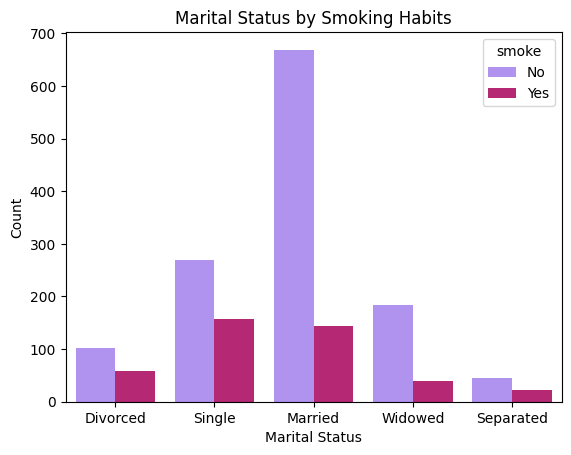

In [14]:
plt.clf()

sns.countplot(data = data, x = 'marital_status', hue = 'smoke', palette = custom_palette)

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status by Smoking Habits')

plt.show()

<Figure size 640x480 with 0 Axes>

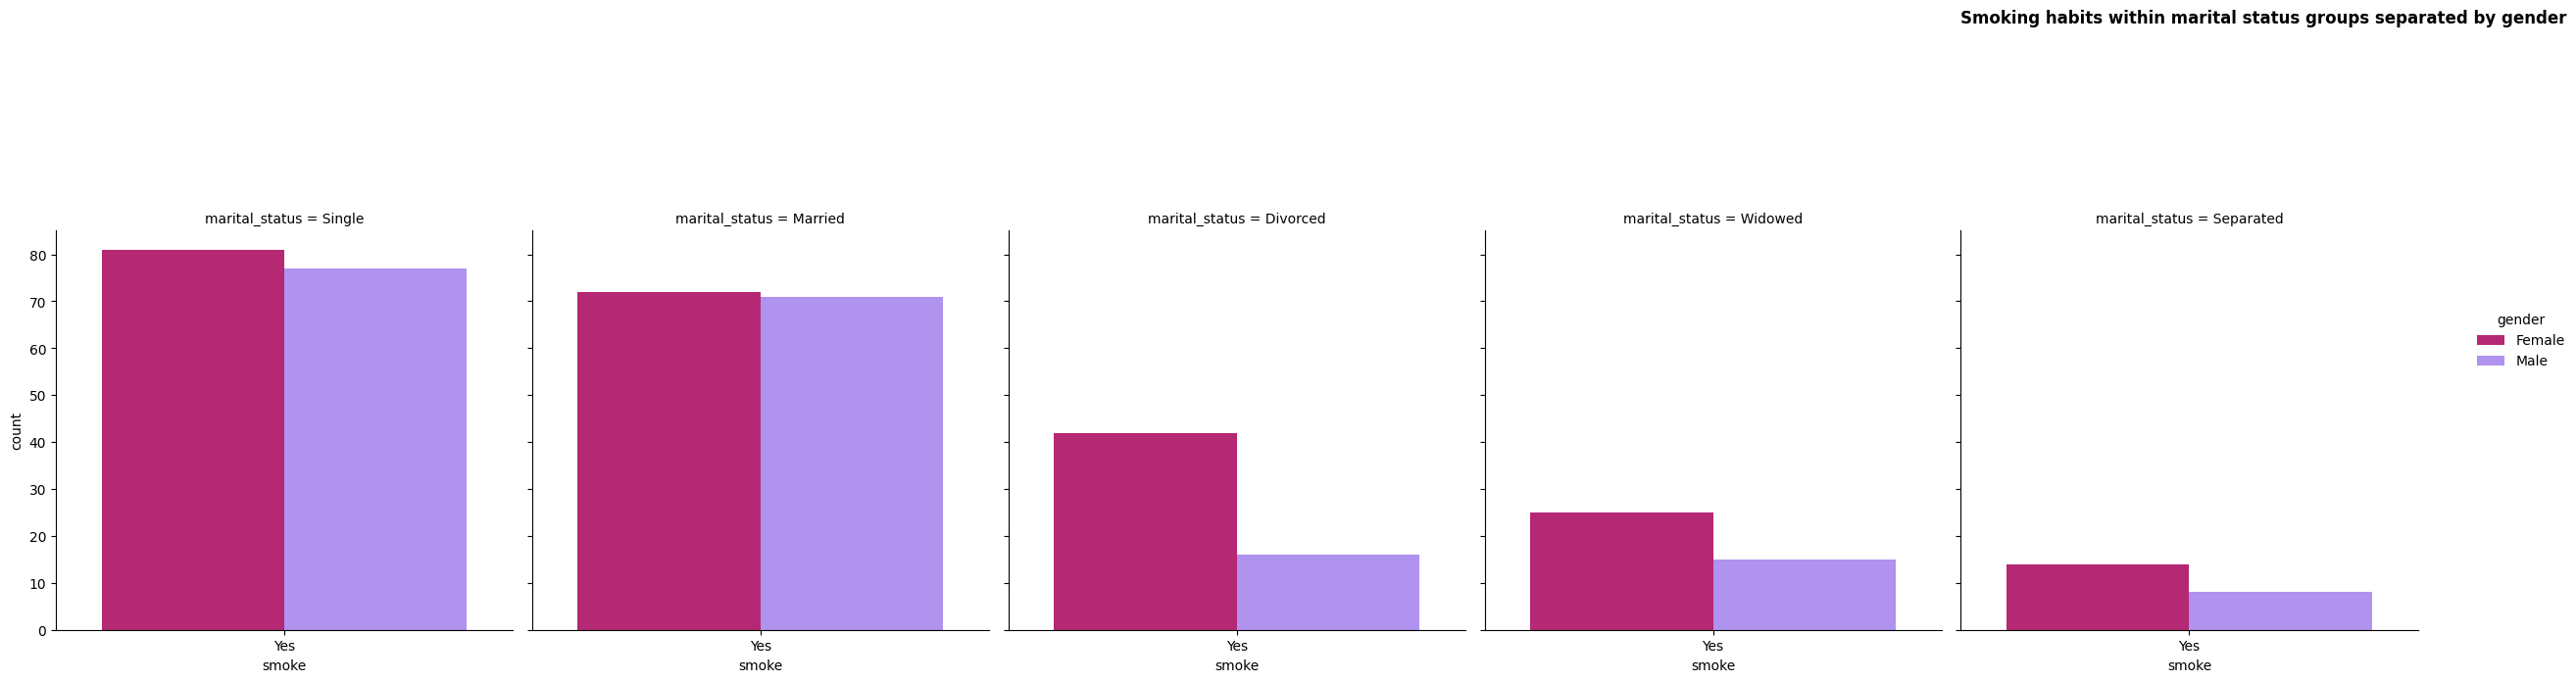

In [15]:
plt.clf()

custom_palette2 = {'Female': '#CD1076', 'Male': '#AB82FF'}

sns.catplot(data = data[data['smoke'] == 'Yes'], x = 'smoke', hue = 'gender', col = 'marital_status', kind = 'count', palette = custom_palette2)

plt.title('Smoking habits within marital status groups separated by gender', loc='left', fontweight='bold', y =1.5)

plt.show()

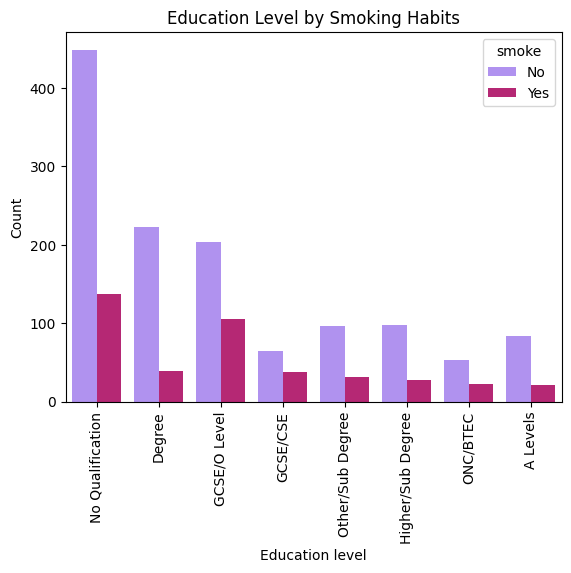

In [16]:
plt.clf()

custom_palette = {'Yes': '#CD1076', 'No': '#AB82FF'}

ax = sns.countplot(data = data, x = 'highest_qualification', hue = 'smoke', palette = custom_palette)

plt.xlabel('Education level')
plt.ylabel('Count')
plt.title('Education Level by Smoking Habits')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

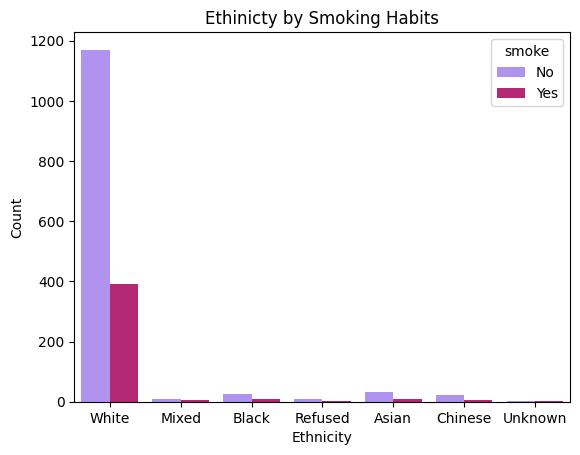

In [17]:
plt.clf()

sns.countplot(data = data, x = 'ethnicity', hue = 'smoke', palette = custom_palette)

plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethinicty by Smoking Habits')

plt.show()

# Decision Trees: Classification
In this section, multiple decision trees were employed to classify individuals as smokers or non-smokers based on demographic factors such as age, gender, marital status, education level, and ethnicity. The initial decision tree exhibited a test accuracy score of 68%, but its size was notably large with a considerable number of levels and branches. To address this issue, pre-pruning and post-pruning techniques inspired by ARUNMOHAN_003 were implemented with the aim of reducing complexity and striking a balance between intricacy and accuracy.

Following pre-pruning, a substantial improvement was observed, with the test accuracy score rising to 74%. This indicated that the pruning process successfully enhanced the model's predictive performance. However, even after post-pruning, the accuracy score remained relatively consistent.

Notably, during the visualization of the decision tree, an unexpected pattern emerged whereby all instances were classified as 'non-smokers'. This unexpected outcome could potentially be attributed to the inherent imbalance in smoking habits observed within the characteristics of the sample population.

These findings underscore the importance of carefully considering the implications of imbalanced data and the potential impact on decision tree modeling outcomes. Future research should focus on addressing this imbalance and exploring alternative approaches to accurately capture the relationship between predictor variables and smoking behavior.

In [18]:
# dropping observations with missing responses in the 'smoke' variable
data_tree = data.dropna(subset = ['smoke'])

In [19]:
# identify the target and predictor variables

target = "smoke"
cat_predictors = ["gender", "marital_status", "highest_qualification", "ethnicity"]
num_predictors = ["age"]

# dummy code the categorical variables
cat_predictors_encoded = pd.get_dummies(data[cat_predictors])

# merge the dummy categorical and numerical predictors
encoded_data = pd.concat([cat_predictors_encoded, data[num_predictors]], axis=1)

In [20]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(encoded_data, data[target], test_size = 0.3, random_state = 19)

In [21]:
# initialise classifier
classifier = DecisionTreeClassifier()

# fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Get predictions and accuracy score
y_pred = classifier.predict(X_test)

accuracy1= accuracy_score(y_test, y_pred)
print(" Test accuracy for the first decison tree is:", accuracy1)

 Test accuracy for the first decison tree is: 0.6830708661417323


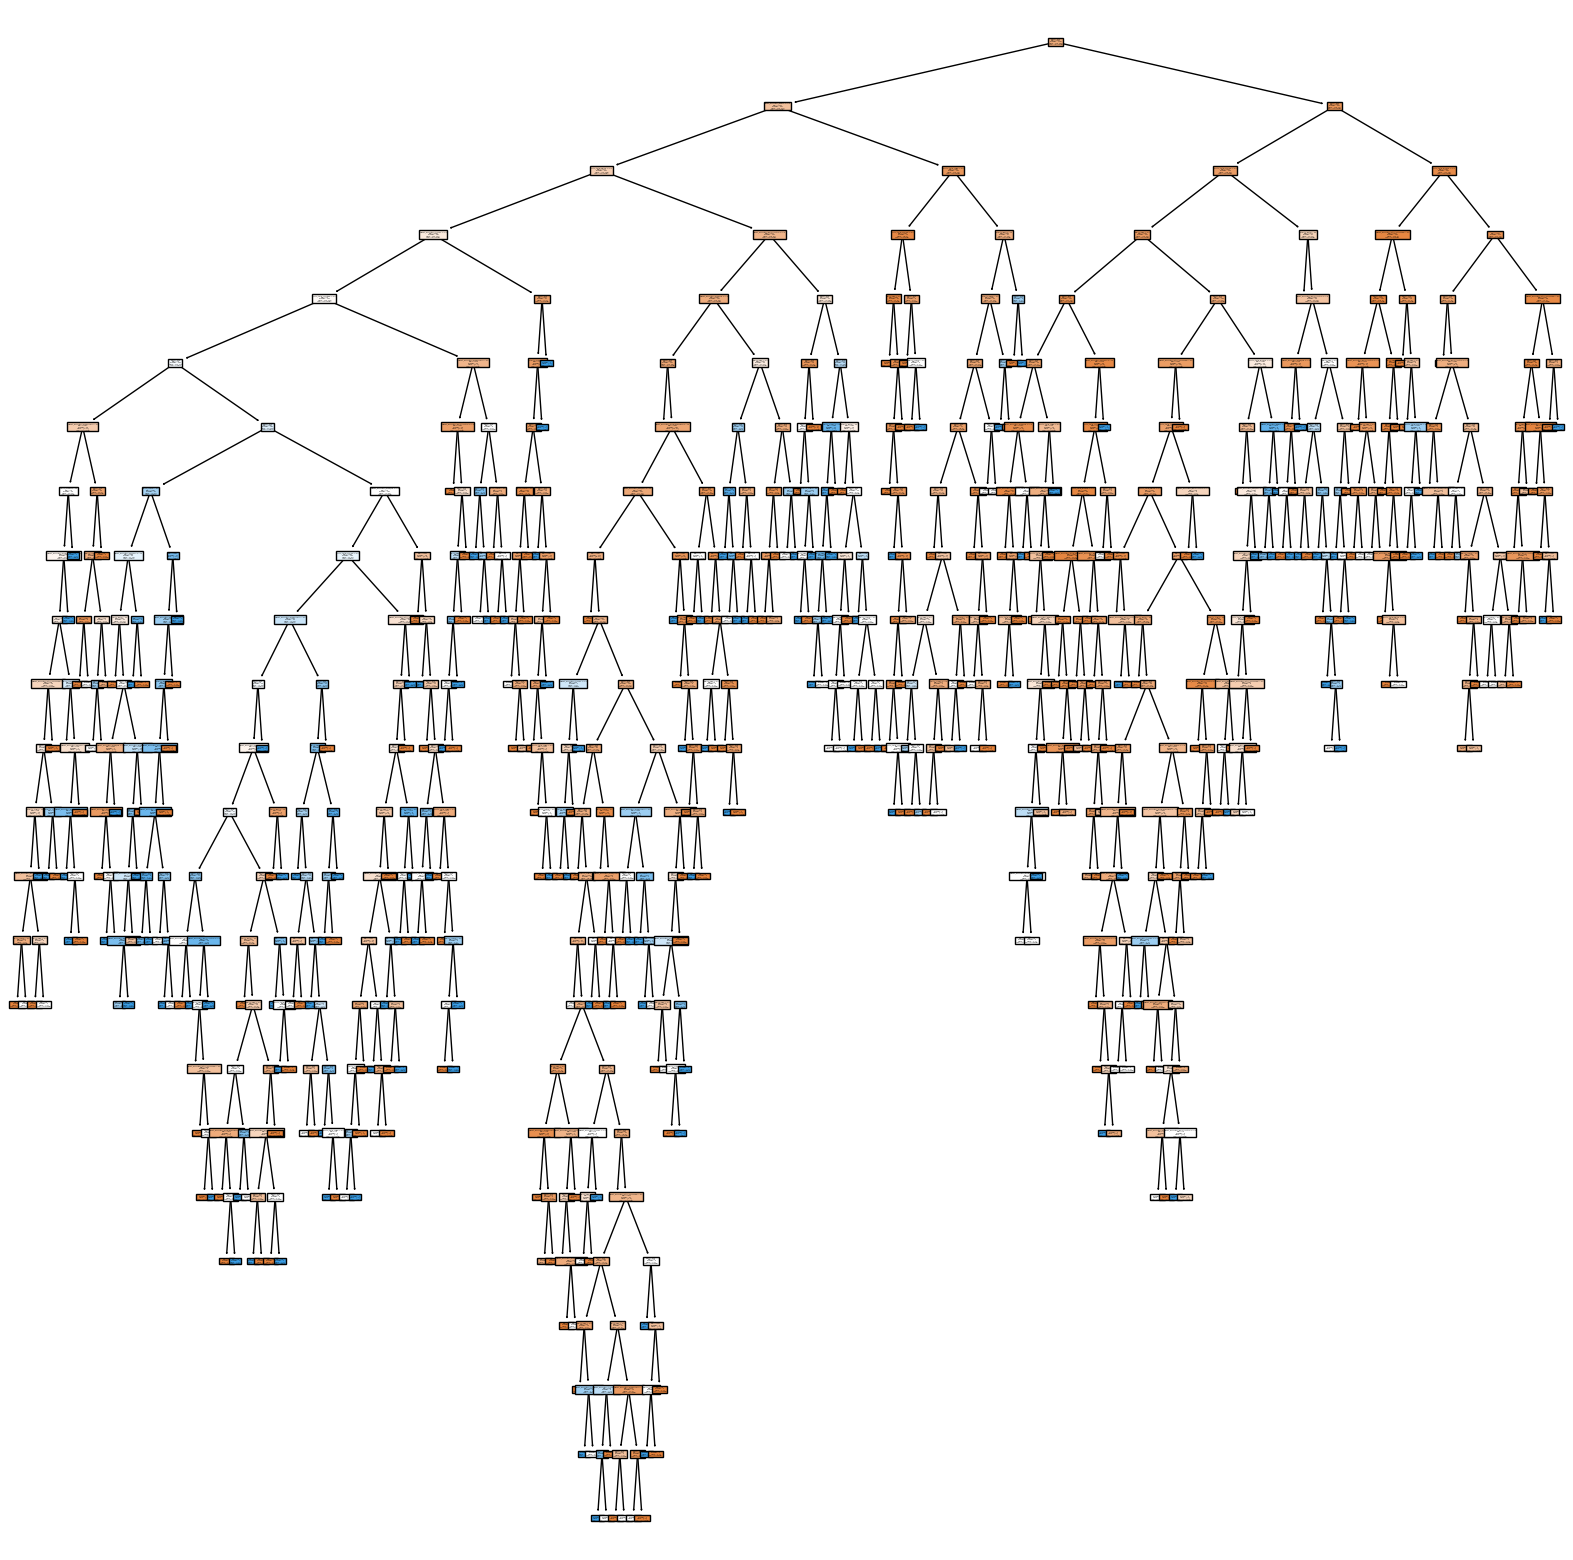

In [23]:
# Visualising decision tree
plt.figure(figsize=(20,20))
features = encoded_data.columns
classes = ['Non-smoker','Smoker']
tree.plot_tree(classifier,feature_names=features,class_names=classes,filled=True)
plt.show()

In [24]:
# Pre-pruning - adapted from ARUNMOHAN_003
params = {'max_depth': [4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

gcv = GridSearchCV(estimator=classifier,param_grid=params, cv = 5)
gcv.fit(X_train,y_train)

model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.7582417582417582
Test score 0.7421259842519685


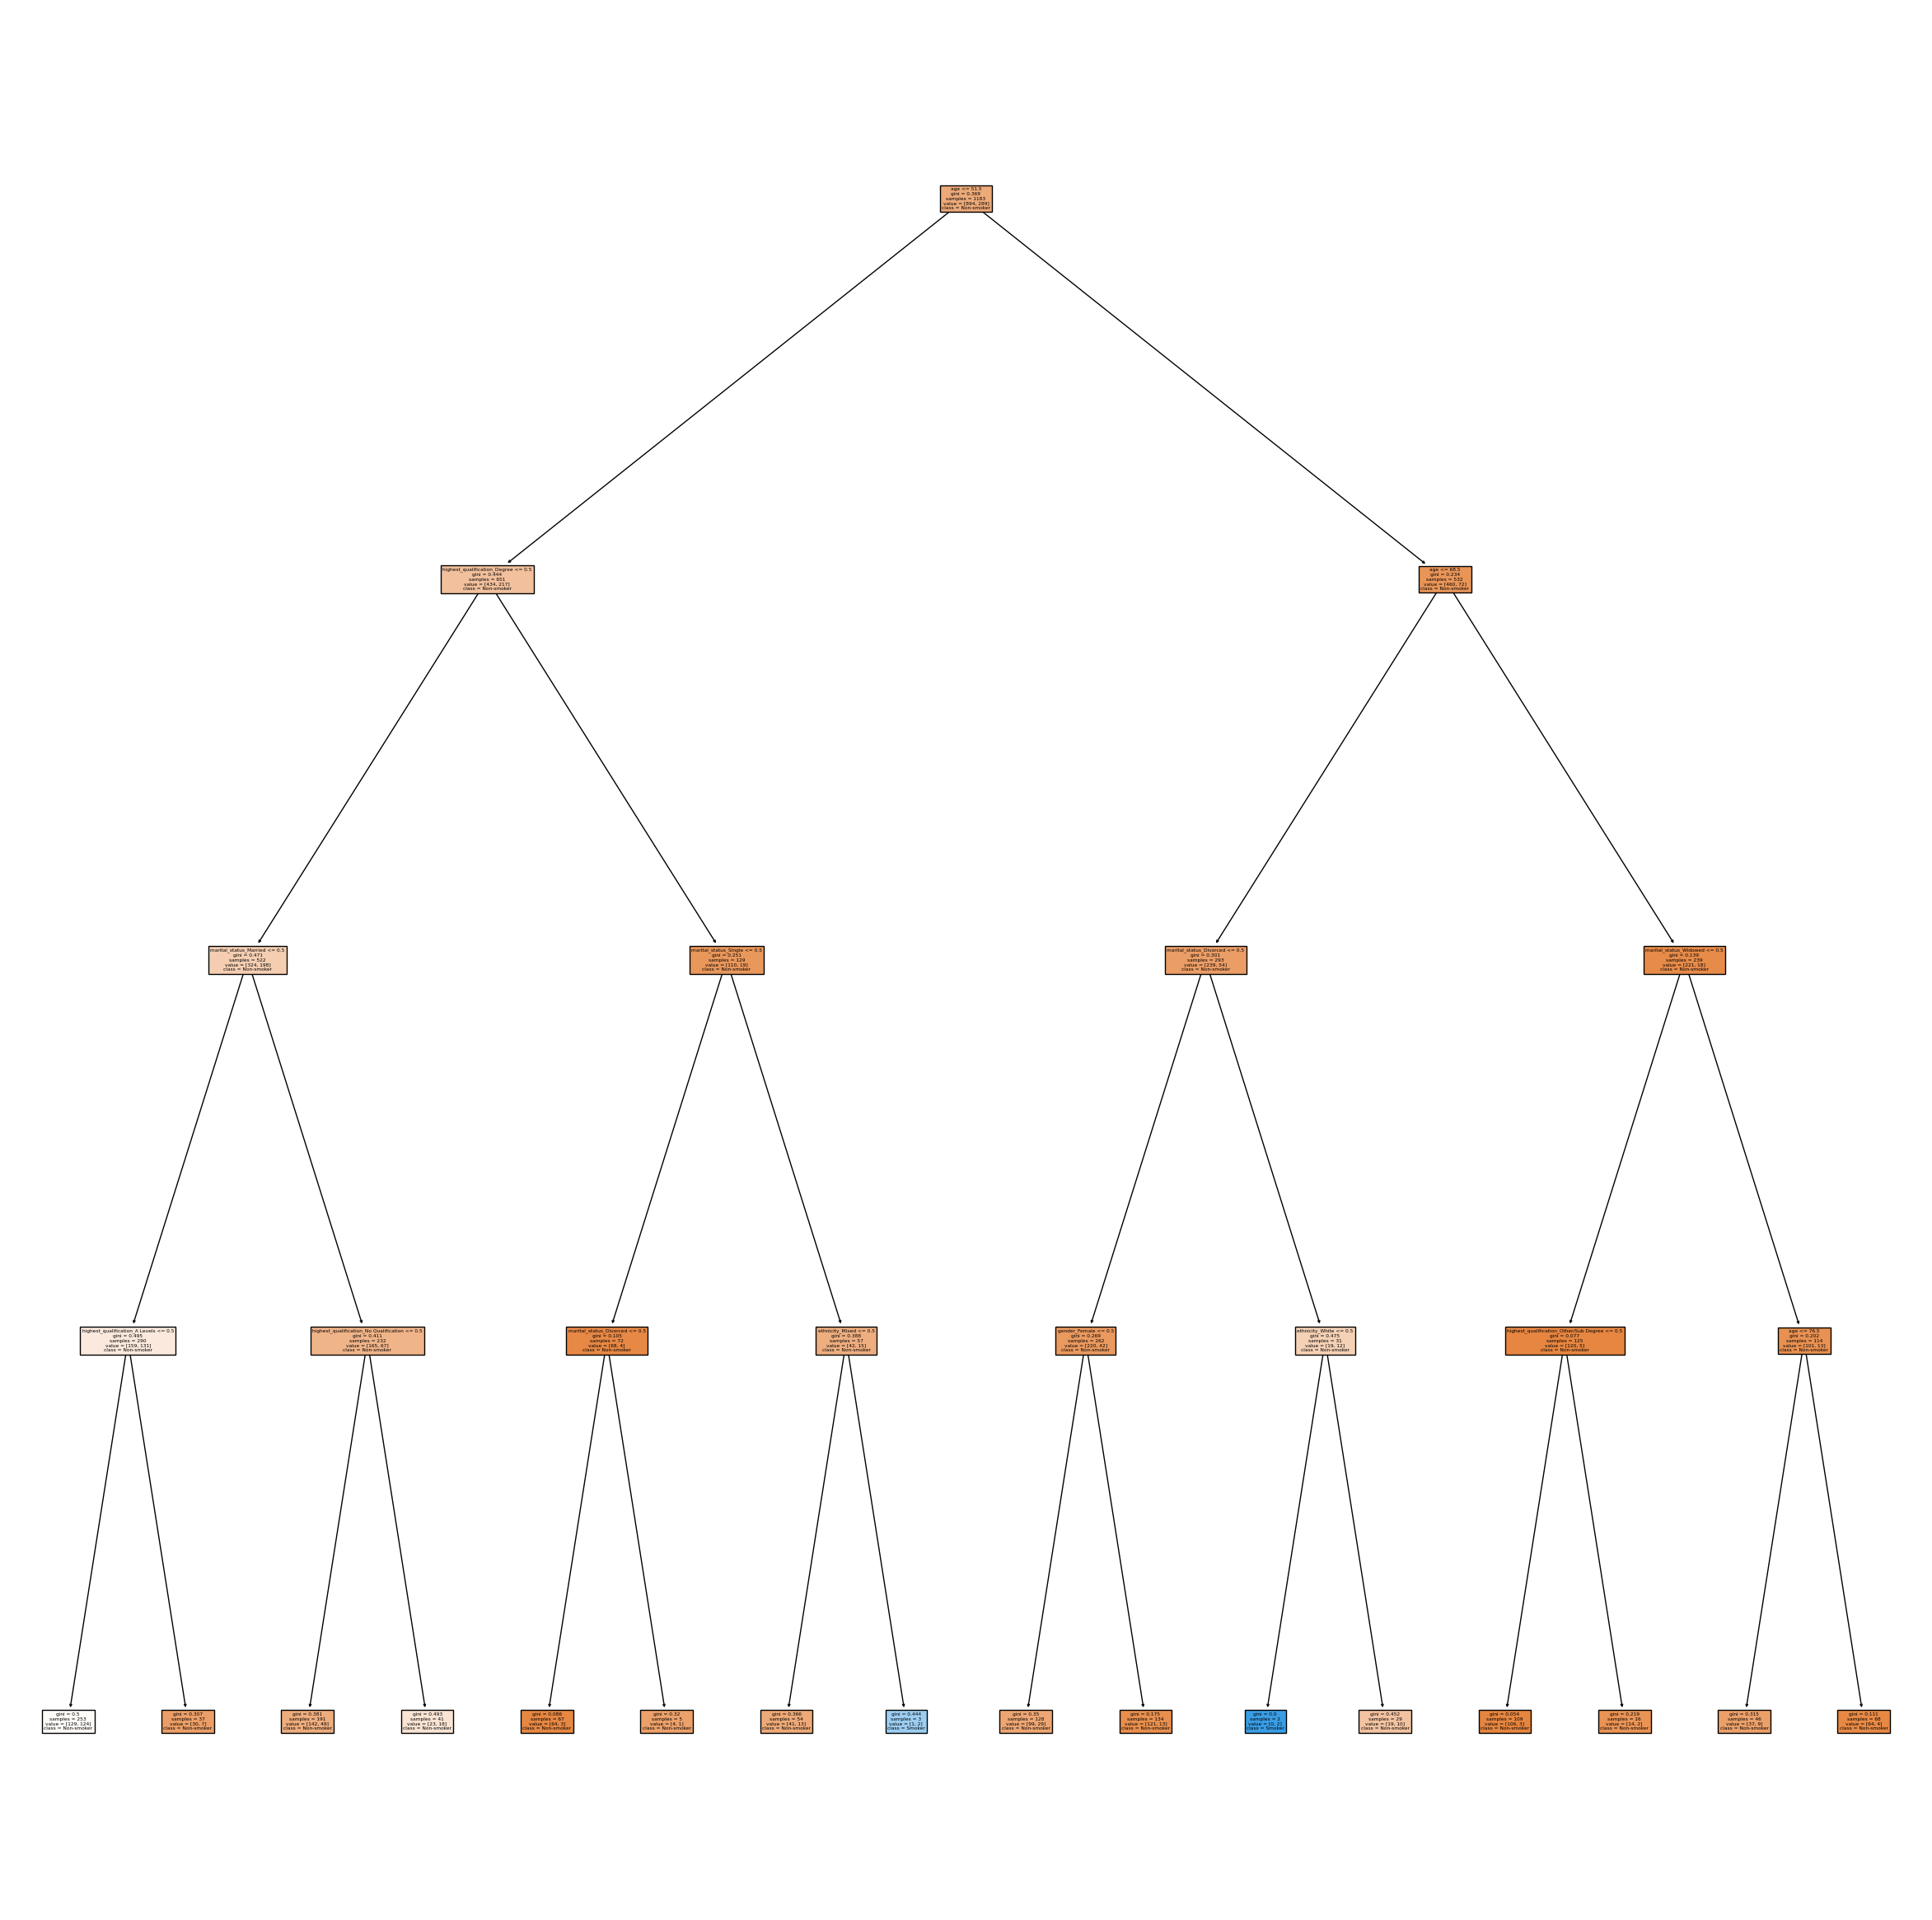

In [25]:
plt.figure(figsize=(30,30))
features = encoded_data.columns
classes = ['Non-smoker','Smoker']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [26]:
# Cost complexity pruning
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.01263938e-05 2.41516725e-05
 4.02527875e-05 7.04423781e-05 1.16500856e-04 1.17403964e-04
 1.20758363e-04 1.26796281e-04 1.26796281e-04 1.31646412e-04
 1.40884756e-04 1.40884756e-04 1.42068662e-04 1.44497186e-04
 1.61011150e-04 1.65425972e-04 1.65776963e-04 1.69061708e-04
 1.69061708e-04 1.76105945e-04 1.97604593e-04 2.11327134e-04
 2.11327134e-04 2.11327134e-04 2.11327134e-04 2.25415610e-04
 2.37125512e-04 2.62708634e-04 2.71706316e-04 2.81769513e-04
 2.81769513e-04 2.81769513e-04 2.81769513e-04 2.81769513e-04
 2.81769513e-04 2.81769513e-04 2.81769513e-04 2.81769513e-04
 2.81769513e-04 2.81769513e-04 2.95857988e-04 3.13840704e-04
 3.16990702e-04 3.22022300e-04 3.24863673e-04 3.38123415e-04
 3.38123415e-04 3.48115242e-04 3.62275088e-04 3.75692683e-04
 4.12188544e-04 4.16528845e-04 4.16528845e-04 4.22654269e-04
 4.22654269e-04 4.22654269e-04 4.22654269e-04 4.22654269e-04
 4.25785041e-04 4.393379

In [27]:
# For each alpha we will append our model to a list!!
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

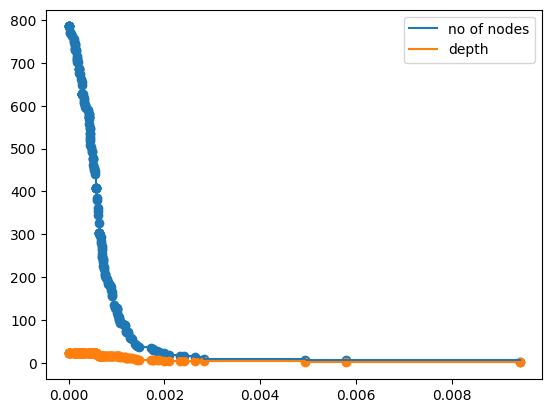

In [28]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

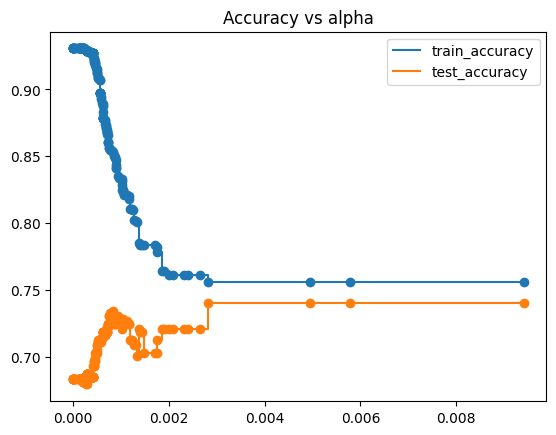

In [29]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# choose alpha 0.004


In [30]:
clf_final = DecisionTreeClassifier(random_state=0,ccp_alpha=0.003)
clf_final.fit(X_train,y_train)
y_train_pred = clf_final.predict(X_train)
y_test_pred = clf_final.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.7557058326289096
Test score 0.7401574803149606


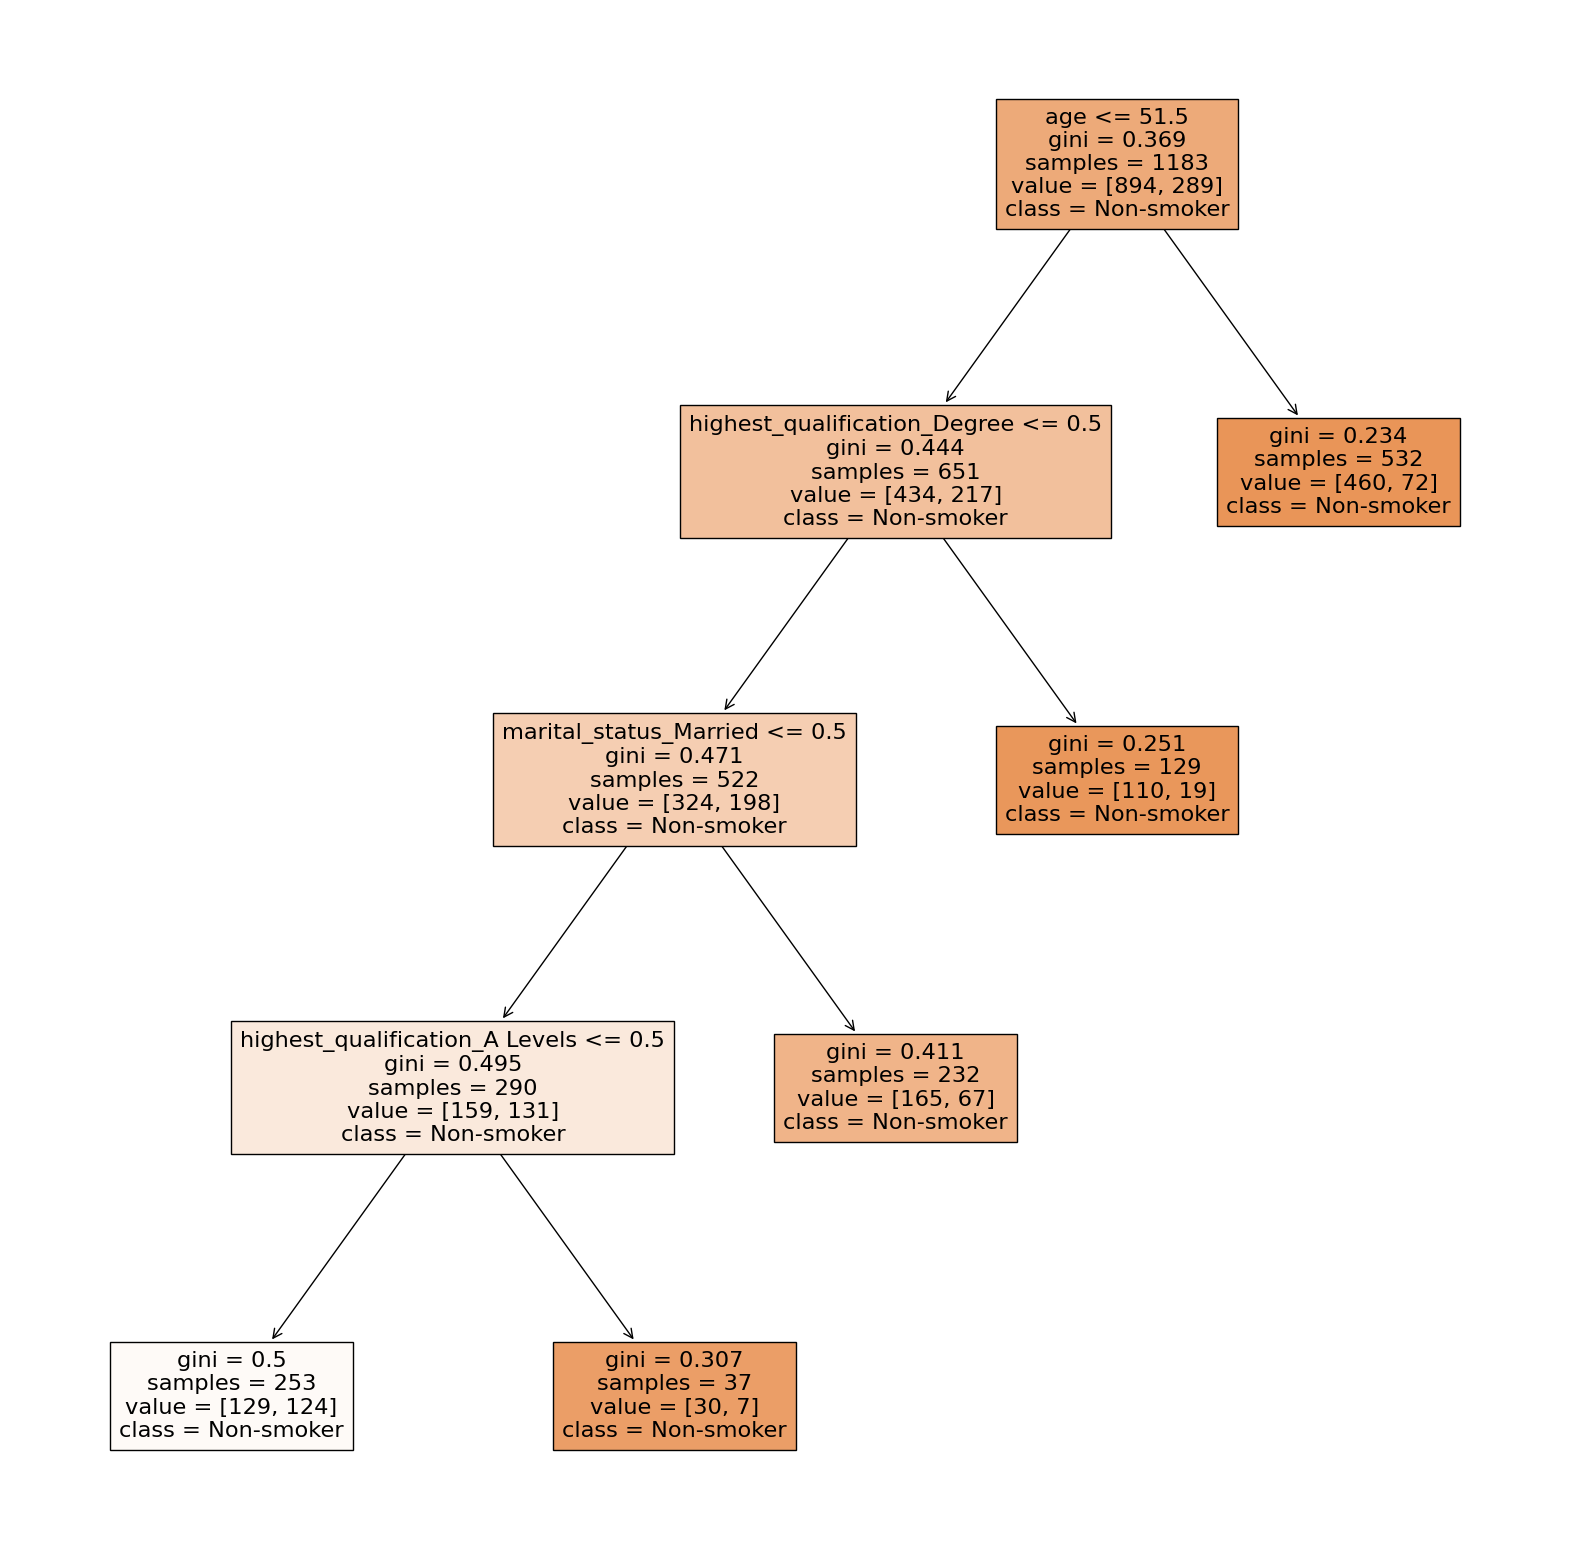

In [31]:
plt.figure(figsize=(20,20))
features = encoded_data.columns
classes = ['Non-smoker','Smoker']
tree.plot_tree(clf_final,feature_names=features,class_names=classes,filled=True)
plt.show()